In [9]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_regression

<font style="font-family: Georgia, 'Times New Roman', Times, serif; font-size: 16px; color: #333333;"><span style="color:blue">Generating a Random Dataset with Scikit-Learn:</span>
This dataset comprises one feature and n samples.</font>

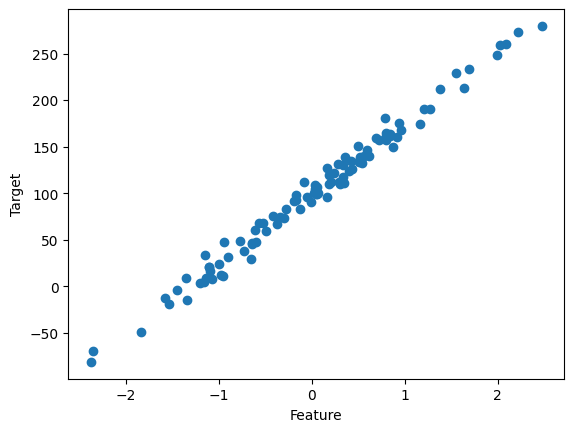

In [10]:
np.random.seed(4) 
n = 1 
m = 100 
x, y = make_regression(n_samples=m, n_features=n, noise=10) 
y = y + 100 
y = y.reshape(y.shape[0], 1)
plt.scatter(x, y)
plt.xlabel('Feature')
plt.ylabel('Target')
y = y.reshape(y.shape[0], 1)
plt.show()

In [11]:
# Add a bias term to the feature matrix X(Add a column of ones)
X = np.hstack((np.ones(x.shape), x)) 
X.shape

(100, 2)

<font style="font-family: Georgia, 'Times New Roman', Times, serif; font-size: 16px; color: #333333;">Defining functions to implement a linear regression model. These functions include:</font>

- <font style="font-family: Georgia, 'Times New Roman', Times, serif; font-size: 14px; color: #555555;">model(theta, X): Represents the linear regression model, where theta are the coefficients and X is the feature matrix.</font>
- <font style="font-family: Georgia, 'Times New Roman', Times, serif; font-size: 14px; color: #555555;">cost_function(theta, X, y): Calculates the cost function J(theta) for linear regression, defined as <div>$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (X \cdot \theta - y)^2$$.</div></font>
- <font style="font-family: Georgia, 'Times New Roman', Times, serif; font-size: 14px; color: #555555;">gradient(theta, X, y):  The gradient of the cost function J(theta) with respect to theta is calculated as
 <div>$$
\nabla J(\theta) = \frac{1}{m} X^T \cdot (X \cdot \theta - y)
$$

</div></font>
- <font style="font-family: Georgia, 'Times New Roman', Times, serif; font-size: 14px; color: #555555;">gradient_descent(theta, X, y): Implements the gradient descent algorithm to find the best coefficients for our linear regression model. It keeps track of the cost and theta history to visualize how the model is trained.</font>

<font style="font-family: Georgia, 'Times New Roman', Times, serif; font-size: 16px; color: #333333;">These functions collectively enable the construction and optimization of a linear regression model.</font>


In [14]:
def model(theta, X):
    return X.dot(theta)

def cost_function(theta, X, y):
    m = len(y)
    J = 1 / (2 * m) * np.sum((model(theta, X) - y) ** 2)
    return J

def gradient(theta, X, y):
    m = len(y)
    return 1 / m * X.T.dot((model(theta, X) - y))

def gradient_descent(X, y, theta, learning_rate=0.001, iterations=1000):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, theta.shape[0]))
    for i in range(0, iterations):
        prediction = model(theta, X)
        theta = theta - learning_rate * gradient(theta, X, y)
        cost_history[i] = cost_function(theta, X, y)
        theta_history[i, :] = theta.T
    return theta, cost_history, theta_history

<font style="font-family: Georgia, 'Times New Roman', Times, serif; font-size: 16px; color: #333333;">Training and visualizing the model and the learning curve</font>

Final theta: [[89.76122916]
 [67.00508551]]


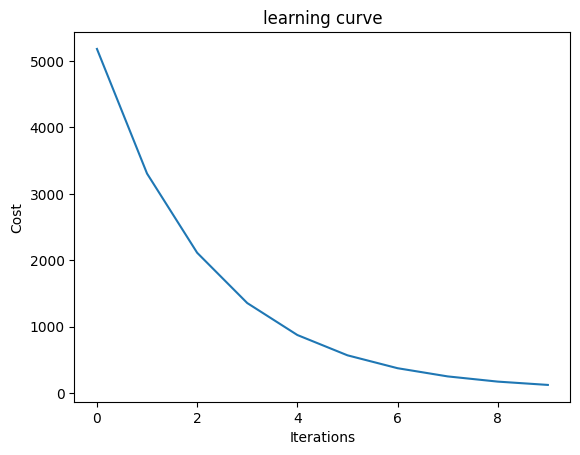

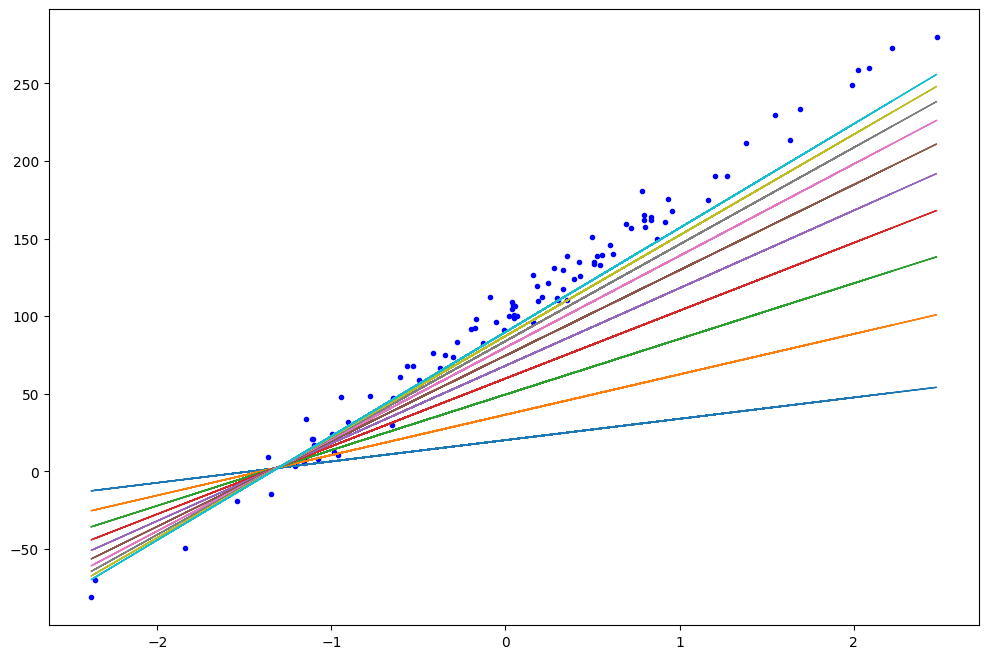

In [15]:
theta = np.random.randn(2, 1)
theta_final, cost_history, theta_history = gradient_descent(X, y, theta, learning_rate=0.2, iterations=10)

# Print final theta
print("Final theta:", theta_final)

# Plot learning curve
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('learning curve')
plt.show()
fig,ax = plt.subplots(figsize=(12,8)) 
_=ax.plot(x, y, 'b.') 
for i in range(10): 
    _=ax.plot(x, model(theta_history[i],X), lw=1)